In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
!git clone 'https://github.com/DRA0R/metro_medillin_pasajeros'

Cloning into 'metro_medillin_pasajeros'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [3]:
df= pd.read_csv('/content/metro_medillin_pasajeros/pasajeros_movilizados_mensual_metro_de_medellin.csv',sep=';')

In [4]:
df.indice.unique()

array(['metro_linea_a', 'metro_linea_b', 'metro_linea_k', 'metro_linea_j',
       'metro_linea_l', 'metro_linea_1_buses', 'metro_linea_2_buses',
       'metro_cuenca_3', 'metro_cuenca_6', 'metro_cuenca_7_integrados',
       'metro_cuenca_5_integrados', 'metro_tranvia', 'metro_linea_h',
       'metro_cuenca_9_integrados'], dtype=object)

In [ ]:
df.periodo = pd.to_datetime(arg=df.periodo, yearfirst=True, format="%Y%m")

In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   periodo  1085 non-null   datetime64[ns]
 1   indice   1085 non-null   object        
 2   valor    1085 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.6+ KB


In [5]:
df.head()

,periodo,indice,valor
0,201101,metro_linea_a,9939136
1,201101,metro_linea_b,1706614
2,201101,metro_linea_k,529086
3,201101,metro_linea_j,227784
4,201101,metro_linea_l,109644


In [ ]:
df.tail(16)

,periodo,indice,valor
1069,2019-08-01,metro_cuenca_9_integrados,159700
1070,2019-08-01,metro_tranvia,930999
1071,2019-09-01,metro_linea_h,67926
1072,2019-09-01,metro_linea_a,14121137
1073,2019-09-01,metro_linea_b,2333621
1074,2019-09-01,metro_linea_k,668885
1075,2019-09-01,metro_linea_j,432671
1076,2019-09-01,metro_linea_l,69477
1077,2019-09-01,metro_linea_1_buses,2159721
1078,2019-09-01,metro_linea_2_buses,334662


In [ ]:
metro_a = df.loc[df.indice =='metro_linea_a'].reset_index().drop(labels=['index', 'indice'],axis=1)
metro_b = df.loc[df.indice =='metro_linea_b'].reset_index().drop(labels=['index', 'indice'],axis=1)
metro_k = df.loc[df.indice =='metro_linea_k'].reset_index().drop(labels=['index', 'indice'],axis=1)
metro_l = df.loc[df.indice =='metro_linea_l'].reset_index().drop(labels=['index', 'indice'],axis=1)
metro_j = df.loc[df.indice =='metro_linea_j'].reset_index().drop(labels=['index', 'indice'],axis=1)
metro_h = df.loc[df.indice =='metro_linea_h'].reset_index().drop(labels=['index', 'indice'],axis=1)
metro_tranvia = df.loc[df.indice =='metro_tranvia'].reset_index().drop(labels=['index', 'indice'],axis=1)
metro_linea_1 = df.loc[df.indice =='metro_linea_1_buses'].reset_index().drop(labels=['index', 'indice'],axis=1)
metro_linea_2 = df.loc[df.indice =='metro_linea_2_buses'].reset_index().drop(labels=['index', 'indice'],axis=1)

In [ ]:
new_df= [metro_a,metro_b,metro_k,metro_l,metro_j,metro_h,metro_tranvia,metro_linea_1,metro_linea_2]

In [ ]:
c=0
for x in new_df:
  x = x.groupby('periodo').sum()
  new_df[c] = x
  c+=1

In [ ]:
new_df[6].head()

,valor
periodo,
2016-01-01,0
2016-02-01,0
2016-03-01,8829
2016-04-01,260741
2016-05-01,318439


In [ ]:
metros=['metro_a','metro_b','metro_k','metro_l','metro_j',
        'metro_h','metro_tranvia','metro_linea_1','metro_linea_2']

In [ ]:
new_df_dic= {'metro_a':metro_a,
             'metro_b':metro_b,
             'metro_k':metro_k,
             'metro_l':metro_l,
             'metro_j':metro_j,
             'metro_h':metro_h,
             'metro_tranvia':metro_tranvia,
             'metro_linea_1':metro_linea_1,
             'metro_linea_2':metro_linea_2}

In [ ]:
for x in range(len(metros)):
  name = metros[x]
  new_df[x].to_csv(f'./{name}.csv')

In [ ]:
s_metro_a.resample('1Y').sum()

,valor
periodo,
2011-12-31,136168219
2012-12-31,138580511
2013-12-31,149694681
2014-12-31,156447164
2015-12-31,172794304
2016-12-31,176681501
2017-12-31,176778078
2018-12-31,168752767
2019-12-31,121568432


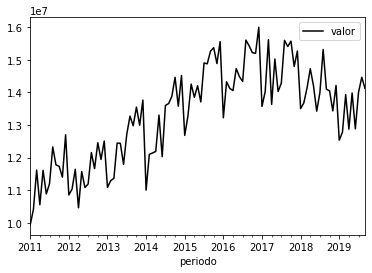

In [ ]:
s_metro_a.plot(style='k')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa66ea3cf10>]],
      dtype=object)

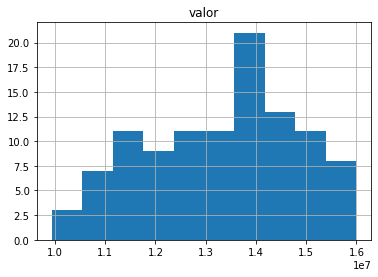

In [ ]:
s_metro_a.hist()

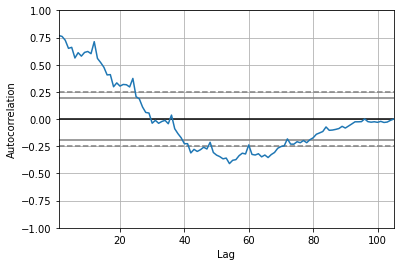

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(s_metro_a)
plt.show()